## Which passenger would survive aboard the SS Titanic?

In [71]:
# importing the libraries

import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

In [72]:
# import the data

df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df_train.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [74]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
# Filling Age missing values with median
df_train['Age'].fillna(df_train.describe()['Age'].loc['50%'], inplace = True)

C:\Users\STACY\AppData\Local\Temp\ipykernel_7004\3009597885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train.describe()['Age'].loc['50%'], inplace = True)


In [76]:
# Fill Embarked missing values with mode as only 2 values are absent
df_train['Embarked'].fillna(df_train.describe(include = 'all')['Embarked'].loc['top'], inplace = True)

C:\Users\STACY\AppData\Local\Temp\ipykernel_7004\3334838997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train.describe(include = 'all')['Embarked'].loc['top'], inplace = True)


In [77]:
# Investigating non unique tickets
ticket_counts = df_train['Ticket'].value_counts()
duplicate_tickets = ticket_counts[ticket_counts > 1].index
joint_ticket_passengers = df_train[df_train['Ticket'].isin(duplicate_tickets)].sort_values(by = 'Ticket')
joint_ticket_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S


<Axes: xlabel='cabin_class', ylabel='count'>

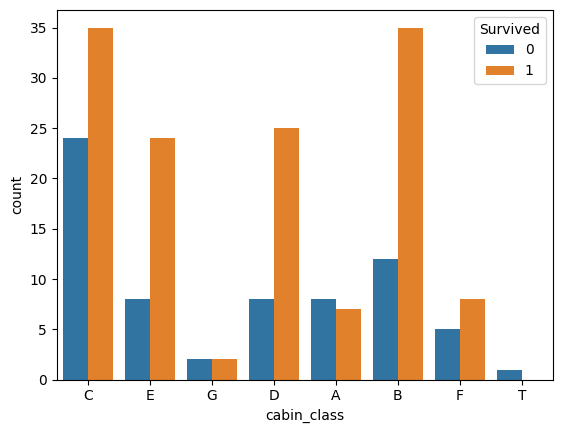

In [78]:
df_train['cabin_class'] = df_train['Cabin'].str[0]
sns.countplot(x='cabin_class', hue = 'Survived', data = df_train)
# https://www.encyclopedia-titanica.org/cabins.html

<Axes: xlabel='Sex', ylabel='count'>

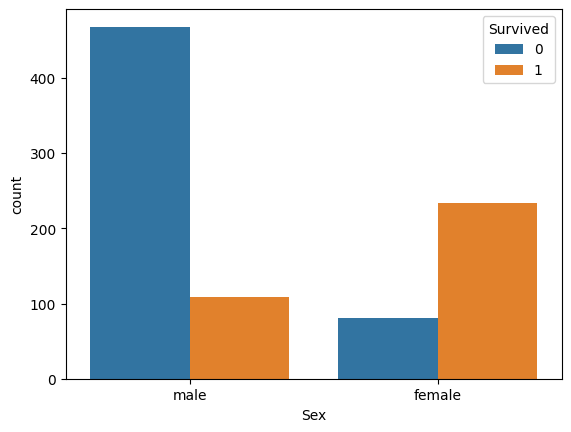

In [79]:
sns.countplot(df_train, x = 'Sex', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

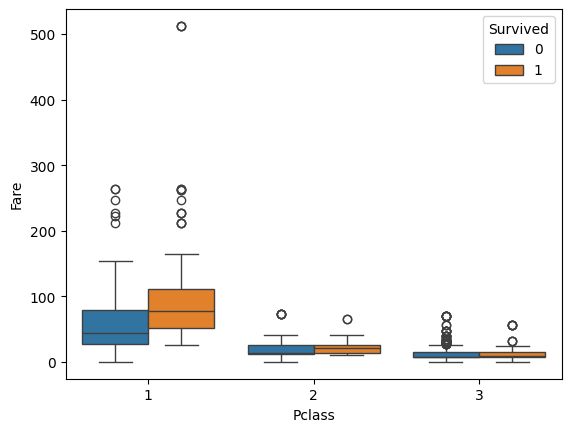

In [80]:
# Visualising distribution of passenger class, fare paid and survival
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df_train)

In [81]:
# Visualising the passenger classes of the available cabins
pd.crosstab(df_train['cabin_class'], df_train['Pclass'])

Pclass,1,2,3
cabin_class,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
T,1,0,0


In [82]:
survival_rate = df_train['Survived'].mean()
survival_rate

np.float64(0.3838383838383838)

In [83]:
joint_ticket_passengers.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,344.000000,344.000000,344.000000,344,344,344.000000,344.000000,344.000000,344,344.000000,115,344
unique,NaN,NaN,NaN,344,2,NaN,NaN,NaN,134,NaN,71,3
top,NaN,NaN,NaN,"Crosby, Capt. Edward Gifford",female,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,180,NaN,NaN,NaN,7,NaN,4,243
mean,444.738372,0.520349,2.084302,NaN,NaN,26.766715,1.136628,0.860465,NaN,59.302434,NaN,NaN
std,258.420773,0.500313,0.878236,NaN,NaN,14.501692,1.508555,1.057118,NaN,68.564443,NaN,NaN
min,4.000000,0.000000,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,233.250000,0.000000,1.000000,NaN,NaN,17.750000,0.000000,0.000000,NaN,20.562500,NaN,NaN
50%,435.500000,1.000000,2.000000,NaN,NaN,28.000000,1.000000,1.000000,NaN,31.331250,NaN,NaN
75%,673.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,1.000000,NaN,76.868775,NaN,NaN


In [84]:
joint_ticket_passengers['Survived'].mean()

np.float64(0.5203488372093024)

The survival rate of those who knew someone on board is much higher. Investigating familial ties might reveal some more insights.

<Axes: xlabel='FamilyPresent', ylabel='count'>

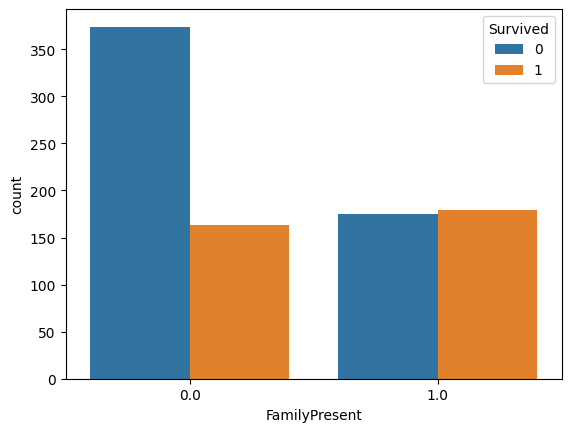

In [85]:
df_train.loc[(df_train['SibSp'] == 0) & (df_train['Parch'] ==0), 'FamilyPresent'] = 0
df_train.loc[(df_train['SibSp'] > 0) | (df_train['Parch'] > 0), 'FamilyPresent'] = 1
sns.countplot(x = 'FamilyPresent', hue = "Survived", data = df_train)

<Axes: xlabel='Age', ylabel='Fare'>

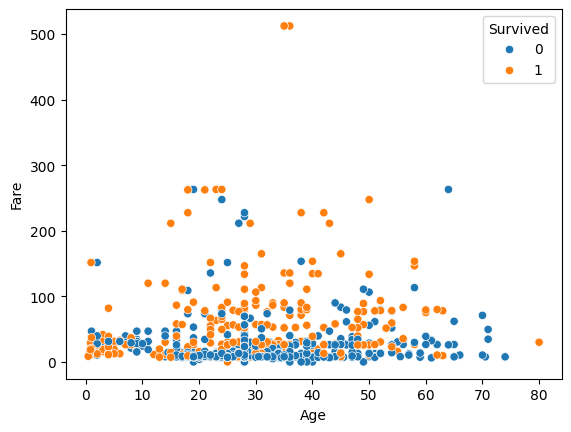

In [86]:
# Visualising relationships between survival, fares paid and age
sns.scatterplot(df_train, x = 'Age', y = 'Fare', hue = 'Survived')

This shows that most of the very young survived, after which Age was not a very strong indicator and those who paid a higher fare seemed to fair better.

<Axes: xlabel='Sex', ylabel='Age'>

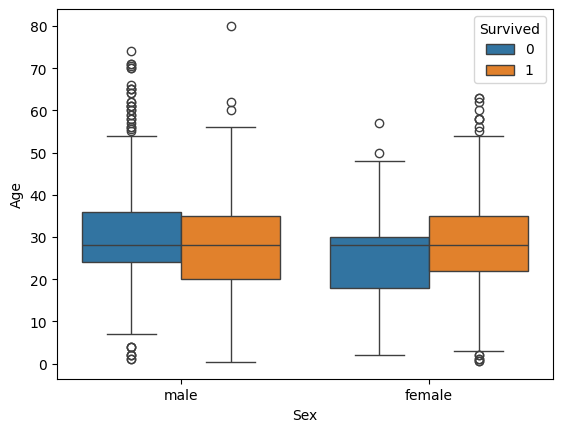

In [87]:
# Visualising age distribution of survivors in relation to gender
sns.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df_train)

<Axes: xlabel='Sex', ylabel='Fare'>

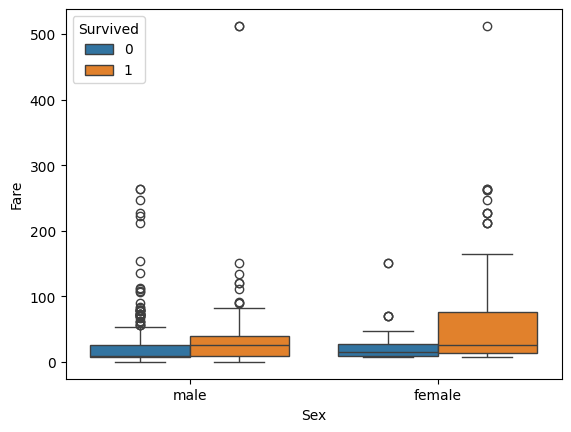

In [88]:
# Passenger who paid more for their passage were more likely to survive
sns.boxplot(x = 'Sex', y = 'Fare', hue = 'Survived', data = df_train)

In [89]:
df_train['Sex'] = df_train['Sex'].map({"male" :0, "female" : 1})
df_train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

C:\Users\STACY\AppData\Local\Temp\ipykernel_7004\3070887307.py:2: FutureWarning: The provided callable <function mean at 0x000001FFE6A000E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  visual = pd.pivot_table(df_train, values = 'Survived', index = 'Pclass', columns = 'Sex', aggfunc=np.mean)


<Axes: ylabel='Pclass'>

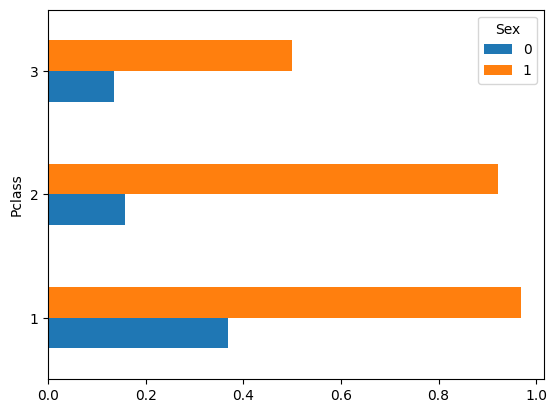

In [90]:
# A visual to investigate survival rates in the three passenger classes with respect to gender
visual = pd.pivot_table(df_train, values = 'Survived', index = 'Pclass', columns = 'Sex', aggfunc=np.mean)
visual.plot(kind = 'barh')

Almost all the female passengers in class 1 survived while a small minority of men survived in class 3.

Whilst we can see that there is a high relationship between the passsenger classs and the cabin, as well as some predictability for survival using the cabin feature, we are unable to appropriately input for the missing cabin values which are a great majority.

In [91]:
#df_train.drop(columns = ['Cabin'], inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_class,FamilyPresent
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,NaN,0.0


In [92]:
df_train.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'cabin_class'], inplace = True)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyPresent
0,0,3,0,22.0,7.2500,S,1.0
1,1,1,1,38.0,71.2833,C,1.0
2,1,3,1,26.0,7.9250,S,0.0
3,1,1,1,35.0,53.1000,S,1.0
4,0,3,0,35.0,8.0500,S,0.0


In [93]:
# Creating dummies for categorical columns with more than 2 categories
for column in df_train.columns:
    if df_train[column].nunique() > 2:
        if df_train[column].dtype == object:
            df_train = pd.get_dummies(df_train, columns = [column], dtype = float)

In [94]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilyPresent,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,1.0,0.0,0.0,1.0
1,1,1,1,38.0,71.2833,1.0,1.0,0.0,0.0
2,1,3,1,26.0,7.9250,0.0,0.0,0.0,1.0
3,1,1,1,35.0,53.1000,1.0,0.0,0.0,1.0
4,0,3,0,35.0,8.0500,0.0,0.0,0.0,1.0


In [95]:
# Splitting our data into features and target variable to fit the model
X = df_train.drop(columns = ['Survived'])
y = df_train['Survived']

In [96]:
# Pipeline for model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Impute missing values
    ('scaler', StandardScaler()),                     # Scale features
    ('classifier', LogisticRegression(max_iter=1000)) # Logistic Regression
])

# Define parameter grid for GridSearch
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'classifier__penalty': ['l2'],                    # Only 'l2' is supported for solvers like 'lbfgs'
    'classifier__solver': ['lbfgs'],                  # Solver
}

In [97]:
# Setting up the model
model = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
model.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']},
             scoring='accuracy')

In [98]:
# Output best parameters and score
print("Best parameters:", model.best_params_)
print("Best cross-validated accuracy:", model.best_score_)

Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validated accuracy: 0.7867679367271357


In [101]:
# Preparing test data for model evaluation
test_passengers = df_test['PassengerId']
# Storing PassengerID for use in the submission file


# Feature Engineering for test data
df_test.loc[(df_test['SibSp'] == 0) & (df_test['Parch'] ==0), 'FamilyPresent'] = 0
df_test.loc[(df_test['SibSp'] > 0) | (df_test['Parch'] > 0), 'FamilyPresent'] = 1

#Dropping unnecessary columns 
df_test.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], inplace = True)

# Converting Sex column to a numerical feature
df_test['Sex'] = df_test['Sex'].map({'male' : 0, 'female' : 1})

# Creating dummies for categorical columns with more than 2 categories
for column in df_test.columns:
    if df_test[column].nunique() > 2:
        if df_test[column].dtype == object:
            df_test = pd.get_dummies(df_test, columns = [column], dtype = float)

In [102]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilyPresent,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,7.8292,0.0,0.0,1.0,0.0
1,3,1,47.0,7.0000,1.0,0.0,0.0,1.0
2,2,0,62.0,9.6875,0.0,0.0,1.0,0.0
3,3,0,27.0,8.6625,0.0,0.0,0.0,1.0
4,3,1,22.0,12.2875,1.0,0.0,0.0,1.0


In [104]:
predict = model.predict(df_test)

predictions = pd.DataFrame({'PassengerId' : test_passengers, 'Survived': predict})
predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
